In [1]:
#import libraries

import random
import bisect
import numpy as np# Define input features:
from numpy import random
from IPython.display import clear_output

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt




# variable inputs
SEED = None
MAXSEEDSEQ = 100000
u1count = 0
counter = 0

vhrthin = pd.read_csv("thinningdata.csv")

In [2]:
##THINNING FOR INTERNAL NETWORK USERS [START,END]

## new node interal arc users [start,end]

#increase vhrthin.per hr by rate; and thin

inc_rate = 1.10



vhrthin['perhr'] = vhrthin.perhr*inc_rate

## thin based on new node

## generate ALL t* under maxlambda in 24 hr period and then thin
maxlambda = np.max(vhrthin.perhr)+.3

print("max lambda: ", maxlambda)

#generate first customer arrival
u1 = random.uniform(0,1)

lambda0 = vhrthin.loc[vhrthin.index == 0, 'perhr'].iloc[0]


cust1 = -1/lambda0*np.log(u1)

vtime = cust1


cust_total = []

cust_total.append(vtime)

while vtime < 24:
    u1 = random.uniform(0,1)
    vtime = vtime - (1/maxlambda)*np.log(u1)
    cust_total.append(vtime)
    if len(cust_total) > 1000: 
        break



cust_total.pop(-1) #pop inplace=True by default


cust_ftotal = []
customer_startinendin = []

ncust = 1

#thin arrival times here
for x in range(len(cust_total)):
    u2 = random.uniform(0,1)
    tlambda = np.floor(cust_total[x])
    tlambda = vhrthin.loc[vhrthin.hr == tlambda,'perhr'].iloc[0]
    if u2 <= tlambda / maxlambda:
        cust_ftotal.append(cust_total[x])
        customer_startinendin.append((ncust, cust_total[x]))
        ncust +=1

'''
##print list
cust_ftotal = pd.DataFrame(cust_ftotal)
cust_ftotal.columns = ["arrival_time"]
cust_ftotal['arrhour'] = cust_ftotal.arrival_time.apply(lambda x: np.floor(x))
cust_ftotal.groupby('arrhour').agg(vcount = ('arrhour','count'))
(cust_ftotal.groupby('arrhour').agg(vcount = ('arrhour','count'))).sum()
'''


customer_startinendin ## contains new customer arrivals in list of tuples [(cust #, arrival time in hrs)]

max lambda:  2.2842307692307693


24.147491320475876

'\n##print list\ncust_ftotal = pd.DataFrame(cust_ftotal)\ncust_ftotal.columns = ["arrival_time"]\ncust_ftotal[\'arrhour\'] = cust_ftotal.arrival_time.apply(lambda x: np.floor(x))\ncust_ftotal.groupby(\'arrhour\').agg(vcount = (\'arrhour\',\'count\'))\n(cust_ftotal.groupby(\'arrhour\').agg(vcount = (\'arrhour\',\'count\'))).sum()\n'

[(1, 2.2374410164740963),
 (2, 4.043131800967196),
 (3, 6.456894873851343),
 (4, 7.232134493228665),
 (5, 8.112637113747391),
 (6, 8.50314150557728),
 (7, 8.934764382822786),
 (8, 10.404942167536554),
 (9, 11.210989967013832),
 (10, 12.621799563007587),
 (11, 14.086058170508418),
 (12, 15.210880252727783),
 (13, 17.724073738641373),
 (14, 18.474190062061066),
 (15, 19.657201198300047),
 (16, 19.699928502924593),
 (17, 19.790306832033817),
 (18, 20.383370946340236),
 (19, 20.38523233423852),
 (20, 21.958464475463877),
 (21, 22.00290312289812),
 (22, 22.015328869858624),
 (23, 22.79252553093912),
 (24, 23.16095132812526)]

In [3]:
## GET ARRIVAL TIMES FOR NON-CLOSED ARCS IE [START,END) AND (START,END]

dfoos = pd.read_csv("oos_newnode.csv")

dfoos

,hour,startinendout_lambda,loglambda,startoutendin_lambda
0,0.0,1.100000,0.000000,2.400000
1,1.0,1.100000,0.000000,1.874074
2,2.0,1.100000,0.000000,1.222222
3,3.0,1.100000,0.000000,1.100000
4,4.0,1.100000,0.000000,1.237500
5,5.0,7.107692,1.865867,2.946429
6,6.0,17.769231,2.782158,7.412308
7,7.0,41.884615,3.639608,9.070769
8,8.0,41.884615,3.639608,16.906154
9,9.0,20.984615,2.948479,8.969231


In [4]:
## arrival times for those that start IN network but end OUTSIDE network [start,end)


## generate ALL t* under maxlambda in 24 hr period and then thin
maxlambda = np.max(dfoos.startinendout_lambda)


#generate first customer arrival
u1 = random.uniform(0,1)

lambda0 = dfoos.loc[dfoos.index == 0, 'startinendout_lambda'].iloc[0]


cust1 = -1/lambda0*np.log(u1)

vtime = cust1


cust_total = []

cust_total.append(vtime)

while vtime < 24:
    u1 = random.uniform(0,1)
    vtime = vtime - (1/maxlambda)*np.log(u1)
    cust_total.append(vtime)
    if len(cust_total) > 1000: 
        break



cust_total.pop(-1) #pop inplace=True by default

len(cust_total)

cust_ftotal = []
customer_startinendout = []

ncust = 1

#thin arrival times here
for x in range(len(cust_total)):
    u2 = random.uniform(0,1)
    tlambda = np.floor(cust_total[x])
    tlambda = dfoos.loc[dfoos.hour == tlambda,'startinendout_lambda'].iloc[0]
    if u2 <= tlambda / maxlambda:
        cust_ftotal.append(cust_total[x])
        customer_startinendout.append((ncust, cust_total[x]))
        ncust +=1

cust_ftotal = pd.DataFrame(cust_ftotal)
cust_ftotal.columns = ["arrival_time"]
cust_ftotal['arrhour'] = cust_ftotal.arrival_time.apply(lambda x: np.floor(x))

##print list
cust_ftotal.groupby('arrhour').agg(vcount = ('arrhour','count'))
(cust_ftotal.groupby('arrhour').agg(vcount = ('arrhour','count'))).sum()

customer_startinendout

23.907486996167247

1000

,vcount
arrhour,
0.0,2
2.0,1
3.0,1
4.0,1
5.0,5
6.0,17
7.0,41
8.0,45
9.0,12


vcount    341
dtype: int64

[(1, 0.8184398616687796),
 (2, 0.997003055525686),
 (3, 2.1474557297834913),
 (4, 3.9912462100915027),
 (5, 4.531236397959976),
 (6, 5.07442599292451),
 (7, 5.662615833835868),
 (8, 5.874995456251036),
 (9, 5.94661571969573),
 (10, 5.993977915257506),
 (11, 6.031317693576852),
 (12, 6.034435617670709),
 (13, 6.045371102764711),
 (14, 6.244480492453595),
 (15, 6.324127096743455),
 (16, 6.339632690648401),
 (17, 6.431514560754749),
 (18, 6.500325491785021),
 (19, 6.504787700025782),
 (20, 6.5286498893231295),
 (21, 6.617092388144321),
 (22, 6.620124622854245),
 (23, 6.638719368270545),
 (24, 6.643103227977058),
 (25, 6.774639017496974),
 (26, 6.79499577503368),
 (27, 6.928565419993369),
 (28, 7.028570967645999),
 (29, 7.129106431998856),
 (30, 7.146757378389914),
 (31, 7.177699983039491),
 (32, 7.179437313766828),
 (33, 7.182771952091365),
 (34, 7.212472855511237),
 (35, 7.217792703191619),
 (36, 7.232173271282145),
 (37, 7.261648023893048),
 (38, 7.261952498598567),
 (39, 7.349432923517

In [5]:
## arrival times for those that start OUT network but end INSIDE network (start,end]

## generate ALL t* under maxlambda in 24 hr period and then thin
maxlambda = np.max(dfoos.startoutendin_lambda)


#generate first customer arrival
u1 = random.uniform(0,1)

lambda0 = dfoos.loc[dfoos.index == 0, 'startoutendin_lambda'].iloc[0]


cust1 = -1/lambda0*np.log(u1)

vtime = cust1


cust_total = []

cust_total.append(vtime)

while vtime < 24:
    u1 = random.uniform(0,1)
    vtime = vtime - (1/maxlambda)*np.log(u1)
    cust_total.append(vtime)
    if len(cust_total) > 1000: 
        break



cust_total.pop(-1) #pop inplace=True by default

len(cust_total)



cust_ftotal = []
customer_startoutendin = []

ncust = 1

#thin arrival times here
for x in range(len(cust_total)):
    u2 = random.uniform(0,1)
    tlambda = np.floor(cust_total[x])
    tlambda = dfoos.loc[dfoos.hour == tlambda,'startoutendin_lambda'].iloc[0]
    if u2 <= tlambda / maxlambda:
        cust_ftotal.append(cust_total[x])
        customer_startoutendin.append((ncust, cust_total[x]))
        ncust +=1

cust_ftotal = pd.DataFrame(cust_ftotal)
cust_ftotal.columns = ["arrival_time"]
cust_ftotal['arrhour'] = cust_ftotal.arrival_time.apply(lambda x: np.floor(x))

##print list
cust_ftotal.groupby('arrhour').agg(vcount = ('arrhour','count'))
(cust_ftotal.groupby('arrhour').agg(vcount = ('arrhour','count'))).sum()

customer_startoutendin

23.778135384823077

1000

,vcount
arrhour,
0.0,1
2.0,4
3.0,1
5.0,4
6.0,8
7.0,9
8.0,18
9.0,6
10.0,7


vcount    279
dtype: int64

[(1, 0.8970450387830677),
 (2, 2.1893617604399314),
 (3, 2.207253451672488),
 (4, 2.304315947774591),
 (5, 2.6448009840068445),
 (6, 3.48670836801566),
 (7, 5.175308754085495),
 (8, 5.3399922220622305),
 (9, 5.680063699654959),
 (10, 5.815909990189534),
 (11, 6.13304907663034),
 (12, 6.134631650485748),
 (13, 6.419178057394403),
 (14, 6.447746702298049),
 (15, 6.535823475125152),
 (16, 6.557413838133303),
 (17, 6.720981833416103),
 (18, 6.768907113798322),
 (19, 7.202083970694718),
 (20, 7.550150087666934),
 (21, 7.639455885211013),
 (22, 7.652454864098272),
 (23, 7.653850114893917),
 (24, 7.674352456192861),
 (25, 7.709822598693635),
 (26, 7.76790814628979),
 (27, 7.906712735759963),
 (28, 8.035107346156222),
 (29, 8.055364763741663),
 (30, 8.13600988817696),
 (31, 8.222354264254225),
 (32, 8.228908455415517),
 (33, 8.235906381879653),
 (34, 8.363266626958863),
 (35, 8.37701536223397),
 (36, 8.416574975253257),
 (37, 8.549614237368443),
 (38, 8.619112162176279),
 (39, 8.64830549977188

In [6]:
## plot total customers for optimization peak analysis

totalcust = customer_startinendin.copy()

for i in range(len(customer_startinendout)):
    totalcust.append((len(totalcust)+1,customer_startinendout[i][1]))
    
for i in range(len(customer_startoutendin)):
    totalcust.append((len(totalcust)+1,customer_startoutendin[i][1]))

#verify length sums
assert len(totalcust) == len(customer_startinendin)+len(customer_startinendout)+len(customer_startoutendin), "Error, check totals"

#create panda dataframe
totalcust = pd.DataFrame(totalcust)
totalcust.drop(columns=0, inplace=True)
totalcust.columns = ["arrival_time"]
totalcust['arrhour'] = totalcust.arrival_time.apply(lambda x: np.floor(x))

#get arrival rates/hr
totalcustrate = totalcust.groupby("arrhour").agg(vcount = ('arrhour','count'))

totalcustrate; totalcustrate.vcount.describe()

,vcount
arrhour,
0.0,3
2.0,6
3.0,2
4.0,2
5.0,9
6.0,26
7.0,51
8.0,66
9.0,18


count    23.000000
mean     28.000000
std      22.849309
min       2.000000
25%      10.500000
50%      20.000000
75%      41.500000
max      77.000000
Name: vcount, dtype: float64

In [7]:
totalcust

,arrival_time,arrhour
0,2.237441,2.0
1,4.043132,4.0
2,6.456895,6.0
3,7.232134,7.0
4,8.112637,8.0
...,...,...
639,22.780249,22.0
640,22.909189,22.0
641,22.939942,22.0
642,22.961109,22.0


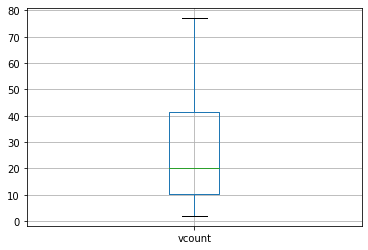

In [8]:
totalcustrate.boxplot()

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Arrival rates customers')

Text(0.5, 0, 'Customer #')

Text(0, 0.5, 'Arrival rate per hr')

([<matplotlib.axis.XTick at 0x7f866d821370>,
 <a list of 23 Text major ticklabel objects>)

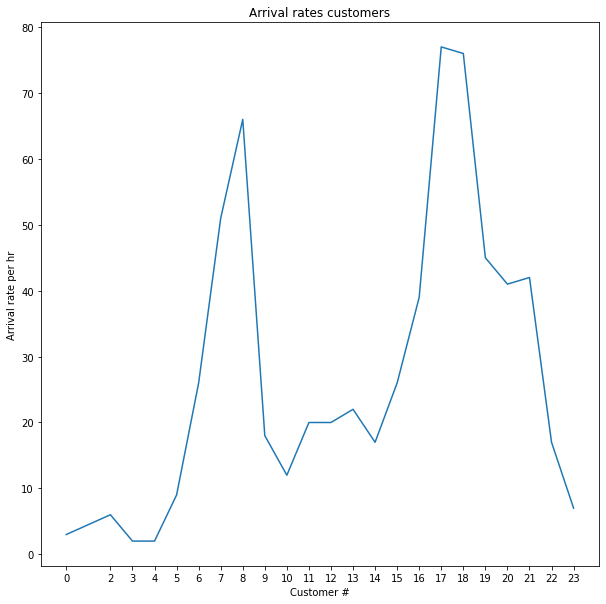

In [9]:
plt.figure(figsize=(10,10))
plt.plot(totalcustrate.index, totalcustrate.vcount)
plt.title(r'Arrival rates customers')
plt.xlabel('Customer #')
plt.ylabel(r'Arrival rate per hr')
plt.xticks(totalcustrate.index)
#plt.scatter(cus_pts[:,0],cus_pts[:,1],s=150,color='g', zorder=2)

# RESULTS ANALYIS
## based on total arrivals analysis bimodal peaks are from: [6,9] & [16,21] | 6-9AM and 4PM-9PM